## Observations and Insights 

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouseStudy_df = pd.merge(mouse_metadata,study_results,how='outer',on='Mouse ID')
# Display the data table for preview
mouseStudy_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [21]:
#group/sort the dataframe
mouseStudy_df = mouseStudy_df.groupby("Mouse ID").apply(lambda x:x.sort_values("Timepoint")).reset_index(drop=True)
mouseStudy_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [22]:
# Checking the number of mice.
numMice = len(mouseStudy_df['Mouse ID'].unique())
uniqueMiceID = mouseStudy_df['Mouse ID'].unique()
numMice

249

In [23]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicatedMiceData_df = mouseStudy_df[mouseStudy_df.duplicated(['Mouse ID','Timepoint'])]
duplicatedMiceData_df
# print(f"Duplicated rows based on 'Mouse ID' and 'Timepoint' are:\n{duplicatedMiceTimepoint_df}")

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
587,g989,Propriva,Female,21,26,0,45.000000,0
589,g989,Propriva,Female,21,26,5,47.570392,0
591,g989,Propriva,Female,21,26,10,49.880528,0
593,g989,Propriva,Female,21,26,15,53.442020,0
595,g989,Propriva,Female,21,26,20,54.657650,1


In [24]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicatedMiceID = duplicatedMiceData_df['Mouse ID'].unique()
duplicatedMiceID

array(['g989'], dtype=object)

In [25]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouseClean_df = mouseStudy_df.drop_duplicates(subset=['Mouse ID','Timepoint']).reset_index(drop=True)
mouseClean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...
1883,z969,Naftisol,Male,9,30,25,63.145652,2
1884,z969,Naftisol,Male,9,30,30,65.841013,3
1885,z969,Naftisol,Male,9,30,35,69.176246,4
1886,z969,Naftisol,Male,9,30,40,70.314904,4


In [26]:
# Checking the number of mice in the clean DataFrame.
check_numMice = len(mouseClean_df['Mouse ID'].unique())
check_uniqueMiceID = mouseClean_df['Mouse ID'].unique()
check_numMice

249

## Summary Statistics

In [27]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM (standard error of the mean) of the tumor volume for each regimen
tumorMeanSummary = mouseClean_df[["Drug Regimen","Tumor Volume (mm3)"]].groupby("Drug Regimen").mean()
tumorMedianSummary = mouseClean_df[["Drug Regimen","Tumor Volume (mm3)"]].groupby("Drug Regimen").median()
tumorVarianceSummary = mouseClean_df[["Drug Regimen","Tumor Volume (mm3)"]].groupby("Drug Regimen").var(ddof=0)
tumorStdevSummary = mouseClean_df[["Drug Regimen","Tumor Volume (mm3)"]].groupby("Drug Regimen").std()
tumorSEMSummary = mouseClean_df[["Drug Regimen","Tumor Volume (mm3)"]].groupby("Drug Regimen").sem()

# This method is the most straighforward, creating multiple series and putting them all together at the end.
tumorSummary1 = pd.DataFrame.merge(tumorMeanSummary,tumorMedianSummary,how="outer",left_index=True,right_index=True,suffixes=('_Mean','_Median'))
tumorSummary2 = pd.DataFrame.merge(tumorVarianceSummary,tumorStdevSummary,how="outer",left_index=True,right_index=True,suffixes=('_Var','_Stdev'))
tumorSummary3 = pd.DataFrame.merge(tumorSummary2,tumorSEMSummary,how="outer",left_index=True,right_index=True).rename(columns={'Tumor Volume (mm3)':'Tumor Volume (mm3)_SEM'})
tumorSummary_df = pd.DataFrame.merge(tumorSummary1,tumorSummary3,how="outer",left_index=True,right_index=True)
tumorSummary_df = tumorSummary_df.reset_index()
tumorSummary_df

,Drug Regimen,Tumor Volume (mm3)_Mean,Tumor Volume (mm3)_Median,Tumor Volume (mm3)_Var,Tumor Volume (mm3)_Stdev,Tumor Volume (mm3)_SEM
0,Capomulin,40.675741,41.557809,24.839296,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.069446,6.268188,0.469821
2,Infubinol,52.884795,51.820584,42.886388,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.188930,8.279709,0.603860
4,Naftisol,54.331565,52.509285,65.817708,8.134708,0.596466
5,Placebo,54.033581,52.288934,60.830138,7.821003,0.581331
6,Propriva,52.393463,50.909965,42.862273,6.568014,0.525862
7,Ramicane,40.216745,40.673236,23.383692,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.122106,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.266689,6.966589,0.516398


In [28]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function
tumorSummary_dfQuick = mouseClean_df[["Drug Regimen","Tumor Volume (mm3)"]].groupby("Drug Regimen").agg(['mean','median','var','std','sem'])
tumorSummary_dfQuick = tumorSummary_dfQuick.reset_index()
#MultiIndex column names
tumorSummary_dfQuick

Drug Regimen Tumor Volume (mm3)                                          
                             mean     median        var       std       sem
0    Capomulin          40.675741  41.557809  24.947764  4.994774  0.329346
1     Ceftamin          52.591172  51.776157  39.290177  6.268188  0.469821
2    Infubinol          52.884795  51.820584  43.128684  6.567243  0.492236
3     Ketapril          55.235638  53.698743  68.553577  8.279709  0.603860
4     Naftisol          54.331565  52.509285  66.173479  8.134708  0.596466
5      Placebo          54.033581  52.288934  61.168083  7.821003  0.581331
6     Propriva          52.393463  50.909965  43.138803  6.568014  0.525862
7     Ramicane          40.216745  40.673236  23.486704  4.846308  0.320955
8     Stelasyn          54.233149  52.431737  59.450562  7.710419  0.573111
9    Zoniferol          53.236507  51.818479  48.533355  6.966589  0.516398

In [29]:
#will return a df with all columns under the 'Tumor Volume (mm3)' index
tumorSummary_dfQuick[('Tumor Volume (mm3)')]

,mean,median,var,std,sem
0,40.675741,41.557809,24.947764,4.994774,0.329346
1,52.591172,51.776157,39.290177,6.268188,0.469821
2,52.884795,51.820584,43.128684,6.567243,0.492236
3,55.235638,53.698743,68.553577,8.279709,0.603860
4,54.331565,52.509285,66.173479,8.134708,0.596466
5,54.033581,52.288934,61.168083,7.821003,0.581331
6,52.393463,50.909965,43.138803,6.568014,0.525862
7,40.216745,40.673236,23.486704,4.846308,0.320955
8,54.233149,52.431737,59.450562,7.710419,0.573111
9,53.236507,51.818479,48.533355,6.966589,0.516398


In [30]:
#will return the specific values for 'mean' column under the column index 'Tumor Volume (mm3)'
tumorSummary_dfQuick[('Tumor Volume (mm3)','mean')]

0    40.675741
1    52.591172
2    52.884795
3    55.235638
4    54.331565
5    54.033581
6    52.393463
7    40.216745
8    54.233149
9    53.236507
Name: (Tumor Volume (mm3), mean), dtype: float64

## Bar and Pie Charts

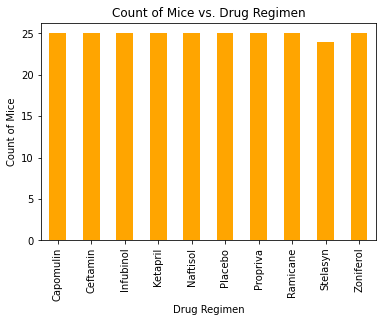

<Figure size 432x288 with 0 Axes>

In [31]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
numMiceDrugRegimen = mouseClean_df.groupby('Drug Regimen')['Mouse ID'].nunique()
micePerDrug_chart = numMiceDrugRegimen.plot(kind='bar',facecolor='orange', title="Count of Mice vs. Drug Regimen")
micePerDrug_chart.set_ylabel("Count of Mice")
plt.show()
plt.tight_layout()

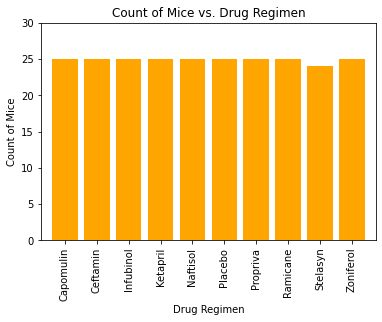

In [32]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
drugRegimens = mouseClean_df['Drug Regimen'].unique()
drugRegimens = sorted(drugRegimens)
x_axis = np.arange(0,len(drugRegimens))
tickLocations = []
for x in x_axis:
    tickLocations.append(x)

plt.title("Count of Mice vs. Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Count of Mice")

plt.xlim(-0.75,len(drugRegimens)-0.25)
plt.ylim(0,max(numMiceDrugRegimen)+5)

plt.bar(x_axis,numMiceDrugRegimen,facecolor='orange',align="center")
plt.xticks(tickLocations,drugRegimens, rotation='vertical')
plt.show()

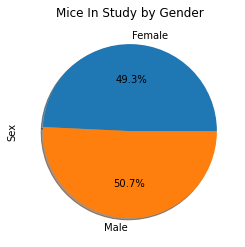

In [33]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouseGender_groups = mouseClean_df.groupby('Sex')['Sex'].count()
gender_pieChart = mouseGender_groups.plot(kind="pie",title="Mice In Study by Gender",shadow=True,autopct='%.1f%%')

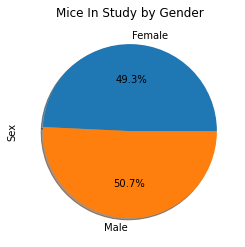

In [34]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mouseSex_df=pd.DataFrame(mouseGender_groups).rename(columns={'Sex':'Count'}).reset_index()
plt.pie(mouseSex_df['Count'],labels=mouseSex_df['Sex'],autopct="%1.1f%%",shadow=True)
plt.title("Mice In Study by Gender")
plt.ylabel("Sex")
plt.show()


## Quartiles, Outliers and Boxplots

In [96]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#find last data point for each 'Mouse ID'
finalTumorsFull_df = mouseClean_df.copy()
finalTumorsFull_df = finalTumorsFull_df.sort_values(by=['Drug Regimen','Mouse ID','Timepoint'])
finalTumorsFull_df = finalTumorsFull_df.drop_duplicates(subset=['Mouse ID'],keep='last').reset_index()

#gather list of the most promising treatment regimens (hard coded for the sake of my sanity)
mostPromising = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

finalTumorsPromising_df = finalTumorsFull_df.loc[finalTumorsFull_df['Drug Regimen'].isin(mostPromising)]
finalTumorsPromising_df

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,183,b128,Capomulin,Female,9,22,45,38.982878,2
1,216,b742,Capomulin,Male,7,21,45,38.939633,0
2,499,f966,Capomulin,Male,16,17,20,30.485985,0
3,522,g288,Capomulin,Male,3,19,45,37.074024,1
4,542,g316,Capomulin,Female,22,22,45,40.159220,2
...,...,...,...,...,...,...,...,...,...
195,1414,s508,Ramicane,Male,1,17,45,30.276232,0
196,1509,u196,Ramicane,Male,18,25,45,40.667713,3
197,1677,w678,Ramicane,Female,5,24,5,43.166373,0
198,1798,y449,Ramicane,Male,19,24,15,44.183451,0


In [ ]:
#RIP when you don't read this below or just do it a different way -.-
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

In [79]:
# THESE DID NOT WORK

# lastTimepoint_df = mouseClean_df.groupby('Drug Regimen')['Timepoint'].max().reset_index()
# timepointVolume_df = mouseClean_df.copy()
# timepointVolume_df = timepointVolume_df[(timepointVolume_df['Timepoint']==45)].reset_index(drop=True)
# timepointVolume_df
#problem cause not all mouseID timepoints max are at 45....

# timepointVolume_df = mouseClean_df[['Drug Regimen','Mouse ID','Timepoint','Tumor Volume (mm3)']].groupby(['Drug Regimen','Mouse ID'])
# timepointVolume_df.dtypes()
# timepointVolume_df[(timepointVolume_df['Timepoint']==45)]
# timepointVolume_df.loc[(timepointVolume_df['Timepoint']==lastTimepoint['Timepoint'])&(timepointVolume_df['Drug Regimen']==lastTimepoint_df['Drug Regimen'])]

# tempDF = tempDF.groupby('Mouse ID')['Timepoint'].max()
#doesnt return the string data :(
# tempDF = tempDF.groupby('Mouse ID').max('Timepoint').reset_index()

In [186]:
#user defined function for quartiles
def quartile_box_info(boxplotData: pd.DataFrame):
    quartiles = boxplotData.quantile([0.25,0.50,0.75])
    lowerq= quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    return quartiles, lowerq, upperq, iqr, lower_bound, upper_bound

#user defined funtion for outliers
def outlier_box_info(boxplotData: pd.DataFrame,lower_bound, upper_bound):
    outlier = []
    for x in boxplotData:
        if (x < lower_bound)|(x>upper_bound):
            outlier.append(x)
    return outlier

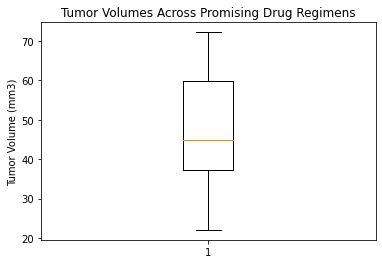

In [187]:
# Put treatments into a list for for loop (and later for plot labels)
mostPromising = finalTumorsPromising_df['Drug Regimen'].unique()

# Create empty list to fill with tumor vol data (for plotting)
tumorVol = finalTumorsPromising_df['Tumor Volume (mm3)']

figAll,axAll = plt.subplots()
axAll.set_title('Tumor Volumes Across Promising Drug Regimens')
axAll.set_ylabel('Tumor Volume (mm3)')
flierprops=dict(marker='o',markerfacecolor='red')
axAll.boxplot(tumorVol,showfliers=True,flierprops=flierprops)
plt.show() 

In [189]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles_full, lowerq_full, upperq_full, iqr_full, lower_bound_full, upper_bound_full = quartile_box_info(tumorVol)

# quartiles_full=tumorVol.quantile([0.25,0.50,0.75])
# lowerq_full = quartiles_full[0.25]
# upperq_full = quartiles_full[0.75]
# iqr_full = upperq_full-lowerq_full
# lower_bound_full = lowerq_full - (1.5*iqr_full)
# upper_bound_full = upperq_full + (1.5*iqr_full)

print(f"The lower quartile of tumor volume (mm3) is: {lowerq_full}")
print(f"The upper quartile of tumor volume (mm3) is: {upperq_full}")
print(f"The interquartile range of tumor volume (mm3) is: {iqr_full}")
print(f"The the median of tumor volume (mm3) is: {quartiles_full[0.5]} ")
print(f"Values below {lower_bound_full} could be outliers.")
print(f"Values above {upper_bound_full} could be outliers.")

#are there any tumor vol outlying?
outlier_full = outlier_box_info(tumorVol,lower_bound_full,upper_bound_full)
# outlier = []
# for x in tumorVol:
#     if (x < lower_bound_full)|(x>upper_bound_full):
#         outlier.append(x)
    
print(f"These are possible outlier values: {outlier_full}")

The lower quartile of tumor volume (mm3) is: 37.187743802499995
The upper quartile of tumor volume (mm3) is: 59.930261755000004
The interquartile range of tumor volume (mm3) is: 22.74251795250001
The the median of tumor volume (mm3) is: 45.0 
Values below 3.0739668737499812 could be outliers.
Values above 94.04403868375002 could be outliers.
These are possible outlier values: []


In [160]:
# Locate the rows which contain mice on each drug and get the tumor volumes
tumorVol_Capomulin = finalTumorsPromising_df.loc[finalTumorsPromising_df['Drug Regimen']==mostPromising[0],['Tumor Volume (mm3)']]['Tumor Volume (mm3)']
tumorVol_Ceftamin = finalTumorsPromising_df.loc[finalTumorsPromising_df['Drug Regimen']==mostPromising[1],['Tumor Volume (mm3)']]['Tumor Volume (mm3)']
tumorVol_Infubinol = finalTumorsPromising_df.loc[finalTumorsPromising_df['Drug Regimen']==mostPromising[2],['Tumor Volume (mm3)']]['Tumor Volume (mm3)']
tumorVol_Ramicane = finalTumorsPromising_df.loc[finalTumorsPromising_df['Drug Regimen']==mostPromising[3],['Tumor Volume (mm3)']]['Tumor Volume (mm3)']

In [167]:
#lengths of each data set
print(f"Campomulin {len(tumorVol_Capomulin)}")
print(f"Ceftamin {len(tumorVol_Ceftamin)}")
print(f"Infubinol {len(tumorVol_Infubinol)}")
print(f"Ramicane {len(tumorVol_Ramicane)}")

Campomulin 25
Ceftamin 25
Infubinol 25
Ramicane 25


In [ ]:
# add subset 
#not sure what this section was meant for....

In [192]:
# Determine outliers using upper and lower bounds - Capomulin
#Campomulin
quartiles_Campomulin, lowerq_Campomulin, upperq_Campomulin, iqr_Campomulin, lower_bound_Campomulin, upper_bound_Campomulin = quartile_box_info(tumorVol_Capomulin)
outlier_Campomulin = outlier_box_info(tumorVol_Capomulin,lower_bound_Campomulin,upper_bound_Campomulin)
#Ceftamin
quartiles_Ceftamin, lowerq_Ceftamin, upperq_Ceftamin, iqr_Ceftamin, lower_bound_Ceftamin, upper_bound_Ceftamin = quartile_box_info(tumorVol_Ceftamin)
outlier_Ceftamin = outlier_box_info(tumorVol_Ceftamin,lower_bound_Ceftamin,upper_bound_Ceftamin)
#Infubinol
quartiles_Infubinol, lowerq_Infubinol, upperq_Infubinol, iqr_Infubinol, lower_bound_Infubinol, upper_bound_Infubinol = quartile_box_info(tumorVol_Infubinol)
outlier_Infubinol = outlier_box_info(tumorVol_Infubinol,lower_bound_Infubinol,upper_bound_Infubinol)
#Ramicane
quartiles_Ramicane, lowerq_Ramicane, upperq_Ramicane, iqr_Ramicane, lower_bound_Ramicane, upper_bound_Ramicane = quartile_box_info(tumorVol_Ramicane)
outlier_Ramicane = outlier_box_info(tumorVol_Ramicane,lower_bound_Ramicane,upper_bound_Ramicane)

In [175]:
#create dictionary of mostPromising
promising_dict ={'Capomulin':tumorVol_Capomulin.values.tolist(),
                 'Ceftamin':tumorVol_Ceftamin.values.tolist(),
                 'Infubinol':tumorVol_Infubinol.values.tolist(),
                 'Ramicane':tumorVol_Ramicane.values.tolist()
                }

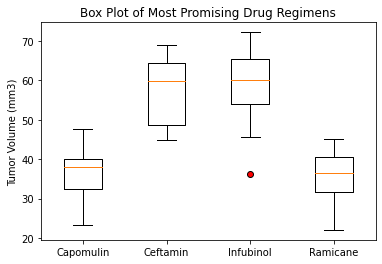

The outliers for each of the most promising drugs are:
Campomulin:[]
Ceftamin:[]
Infubinol:[36.321345799999996]
Ramicane:[]


In [195]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#Capomulin
fig1,ax1 = plt.subplots()
ax1.set_title('Box Plot of Most Promising Drug Regimens')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(promising_dict.values(),showfliers=True,flierprops=flierprops,labels=promising_dict.keys())
plt.show()
print(f"The outliers for each of the most promising drugs are:")
print(f"Campomulin:{outlier_Campomulin}\nCeftamin:{outlier_Ceftamin}\nInfubinol:{outlier_Infubinol}\nRamicane:{outlier_Ramicane}")

## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
